# 피마 인디언데이터 세트

In [ ]:
# 숫자 계산용 라이브러리
import numpy as np
# 표(엑셀) 데이터 처리용 라이브러리
import pandas as pd
# 그래프 그리는 라이브러리
import matplotlib.pyplot as plt

# 데이터를 학습용 / 테스트용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 모델 성능 평가 함수들
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score
from sklearn.metrics import f1_score,confusion_matrix,precision_recall_curve,roc_curve

# 데이터 표준화(스케일 맞추기) 도구
from sklearn.preprocessing import StandardScaler
# 이진 분류용 머신러닝 모델
from sklearn.linear_model import LogisticRegression

# 당뇨병 데이터(csv 파일) 불러오기
diabetes_data=pd.read_csv("diabetes.csv")
# 정답값(Outcome)이 0, 1이 각각 몇 개인지 확인
print(diabetes_data['Outcome'].value_counts())
# 데이터의 앞 3줄만 확인 (구조 파악용)
diabetes_data.head(3)

Outcome
0    500
1    268
Name: count, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [ ]:

# 데이터 구조 확인 (컬럼, 타입, 결측치 등)
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [24]:
# 분류 모델 성능 평가 함수
def get_clf_eval(y_test,pred=None,pred_proba=None):
    # 오차행렬 생성 (맞은 것 / 틀린 것 정리)
    confusion=confusion_matrix(y_test,pred)
    # 정확도: 전체 중 맞은 비율
    accuracy=accuracy_score(y_test,pred)
    # 정밀도: 1이라고 예측한 것 중 진짜 1 비율
    precision=precision_score(y_test,pred)
    # 재현율: 실제 1 중에서 맞춘 비율
    recall=recall_score(y_test,pred)
    # F1 점수: 정밀도와 재현율의 조화 평균
    f1=f1_score(y_test,pred)
    # ROC AUC 점수: 확률 기반 분류 성능
    # “점수표(pred_proba)를 보고 진짜 정답(y_test)을 얼마나 잘 구분했는지 매기는 점수”
    roc_auc=roc_auc_score(y_test,pred_proba)
    
     # 결과 출력
    print("오차행렬")
    print(confusion)

    print("정확도 :{0:.4f}, 정밀도 :{1:.4f} 재현율 :{2:.4f},\
          F1:{3:.4f}, AUC:{4:.4f}".format(accuracy,precision,recall,f1,roc_auc))

In [20]:
def precision_recall_curve_plot(y_test=None,pred_proba_c1=None):
    # 임계값별 precision, recall, threshold 계산 precision_recall_curve라는 함수를쓰면자동으로
    # precision,recall,threshold를 계산해줌
    precisions,recalls,thresholds=precision_recall_curve(y_test,pred_proba_c1)
    print(precisions)
    print(recalls)
    print(thresholds)
    # 그래프 도화지 생성
    plt.figure(figsize=(8,6))

    # thresholds 개수 (precision/recall 길이 맞추기용)
    thresholds_boundary=thresholds.shape[0]
    # Precision 그래프 (점선)
    plt.plot(thresholds,precisions[0:thresholds_boundary],linestyle='--',label='precision')
    # Recall 그래프 (실선)
    plt.plot(thresholds,recalls[0:thresholds_boundary],label='recall')

    # x축 범위 가져오기
    start,end=plt.xlim()

    # x축 눈금 0.1 단위로 설정
    plt.xticks(np.round(np.arange(start,end,0.1),2))

    # 축 이름 설정
    plt.xlabel("Threshold value"); plt.ylabel('Precision and Recall value')
    # 범례 + 격자
    plt.legend(); plt.grid()
    # 그래프 출력
    plt.show()


In [25]:
# 문제 데이터 (마지막 열 제외)
X=diabetes_data.iloc[:,:-1]
# 정답 데이터 (마지막 열)
y=diabetes_data.iloc[:,-1]

# 학습용 / 테스트용 데이터 분리
# test_size=0.2 → 20%는 테스트
# stratify=y → 정답 비율 유지
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=156,stratify=y)

# 로지스틱 회귀 분류기 생성
lr_clf=LogisticRegression()

# 모델 학습 (공부)
lr_clf.fit(X_train,y_train)

# 예측 결과 (0 또는 1)
pred=lr_clf.predict(X_test)

# 예측 확률 중 "1일 확률"만 추출
pred_proba=lr_clf.predict_proba(X_test)[:,1]

# 성능 평가
get_clf_eval(y_test,pred,pred_proba)

오차행렬
[[89 11]
 [19 35]]
정확도 :0.8052, 정밀도 :0.7609 재현율 :0.6481,          F1:0.7000, AUC:0.8428


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0.35064935 0.35294118 0.35526316 0.35761589 0.36       0.36241611
 0.36486486 0.36734694 0.36986301 0.37241379 0.375      0.37762238
 0.38028169 0.38297872 0.38571429 0.38848921 0.39130435 0.39416058
 0.39705882 0.4        0.40298507 0.40601504 0.40909091 0.41221374
 0.41538462 0.41860465 0.421875   0.42519685 0.42857143 0.432
 0.43548387 0.43089431 0.43442623 0.43801653 0.44166667 0.44537815
 0.44915254 0.45299145 0.45689655 0.46086957 0.46491228 0.46902655
 0.47321429 0.47747748 0.48181818 0.48623853 0.49074074 0.48598131
 0.48113208 0.48571429 0.49038462 0.49514563 0.49019608 0.4950495
 0.5        0.50505051 0.51020408 0.51546392 0.52083333 0.52631579
 0.53191489 0.53763441 0.5326087  0.53846154 0.53333333 0.52808989
 0.52272727 0.52873563 0.53488372 0.52941176 0.53571429 0.54216867
 0.53658537 0.54320988 0.55       0.55696203 0.55128205 0.55844156
 0.56578947 0.57333333 0.58108108 0.5890411  0.59722222 0.6056338
 0.6        0.60869565 0.60294118 0.59701493 0.60606061 0.6
 0.609375

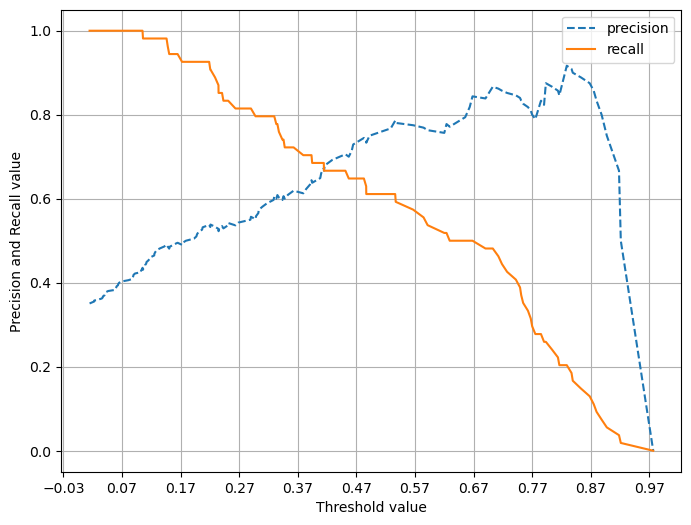

In [21]:
# 테스트 데이터(X_test)에 대해
# 각 샘플이 "클래스 1(양성, 예: 당뇨)"일 확률만 계산
# predict_proba는 [0일 확률, 1일 확률]을 반환하므로
# [:, 1]로 '1일 확률'만 뽑아냄
pred_proba_c1=lr_clf.predict_proba(X_test)[:,1]

# print(pred_proba_c1)
# 실제 정답(y_test)과
# 위에서 구한 "1일 확률(pred_proba_c1)"을 사용해서
# 임계값(threshold)을 0~1 사이로 자동으로 바꿔가며
# 각 임계값에서의 Precision / Recall을 계산하고
# 그 변화를 그래프로 그려주는 함수 호출

precision_recall_curve_plot(y_test,pred_proba_c1)

In [ ]:
# 데이터 전체의 기본 통계 정보 확인
# (평균, 최소값, 최대값 등)
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

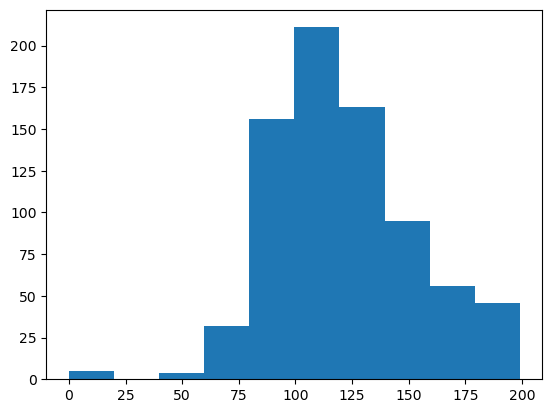

In [ ]:
# 혈당(Glucose) 값의 분포를 히스토그램으로 시각화
plt.hist(diabetes_data['Glucose'],bins=10)


In [ ]:
# 0이 나오면 안 되는 컬럼 목록
zero_features=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

# 전체 데이터 개수 (퍼센트 계산용)
total_count=diabetes_data['Glucose'].count()

# 각 컬럼마다 0 값이 몇 개인지 확인
for feature in zero_features:
    # 해당 컬럼에서 값이 0인 데이터 개수 계산
    zero_count=diabetes_data[diabetes_data[feature]==0][feature].count()
     # 0 값의 개수와 전체 대비 비율 출력
    print("{0} 0 건수는 {1} ,퍼센트는 {2:.2f} %".format(feature,zero_count,100*zero_count/total_count))


Glucose 0 건수는 5 ,퍼센트는 0.65 %
BloodPressure 0 건수는 35 ,퍼센트는 4.56 %
SkinThickness 0 건수는 227 ,퍼센트는 29.56 %
Insulin 0 건수는 374 ,퍼센트는 48.70 %
BMI 0 건수는 11 ,퍼센트는 1.43 %


In [ ]:
# 0이 의미 없는 컬럼들에서
# 0 값을 해당 컬럼의 평균값으로 바꿔준다
# (0을 결측치처럼 처리)
diabetes_data[zero_features]=diabetes_data[zero_features].replace(0, # 바꿀 값
                                                                  diabetes_data[zero_features].mean())# 각 컬럼의 평균값

In [ ]:
# ===============================
# X : 입력 데이터 (마지막 컬럼 제외)
# y : 정답 데이터 (마지막 컬럼)
# ===============================

# iloc[:, :-1] → 모든 행, 마지막 열 제외
X=diabetes_data.iloc[:,:-1]
# iloc[:, -1] → 모든 행, 마지막 열만
y=diabetes_data.iloc[:,-1]


# ===============================
# 데이터 스케일링 (표준화)
# ===============================

# 평균=0, 표준편차=1로 만들어주는 도구 생성
scaler=StandardScaler()

# X 데이터를 표준화
# fit : 평균, 표준편차 계산
# transform : 실제 변환
X_scaled=scaler.fit_transform(X)

# ===============================
# 학습용 / 테스트용 데이터 분리
# ===============================
X_train,X_test,y_train,y_test=train_test_split(X_scaled, # 스케일링된 입력 데이터
                                               y,# 정답 데이터
                                               test_size=0.2, # 전체의 20%를 테스트용으로 사용
                                               random_state=156,# 항상 같은 결과가 나오도록 고정
                                               stratify=y)  # 0/1 비율을 train/test에 동일하게 유지


# ===============================
# 로지스틱 회귀 모델 생성
# ===============================

# 이진 분류용 모델 (0 or 1)
lr_clf=LogisticRegression()


# ===============================
# 모델 학습
# ===============================



# X_train을 보고
# y_train 정답을 맞히도록 학습
lr_clf.fit(X_train,y_train)


# ===============================
# 예측 (0 또는 1)
# ===============================


# 기본 임계값 0.5 기준으로
# 클래스 예측
pred=lr_clf.predict(X_test)


# ===============================
# 예측 확률 (1일 확률만 사용)
# ===============================

# predict_proba 결과:
# [클래스0일 확률, 클래스1일 확률]
# [:, 1] → 1일 확률만 추출
pred_proba=lr_clf.predict_proba(X_test)[:,1]

# ===============================
# 성능 평가
# ===============================

# 오차행렬, 정확도, 정밀도, 재현율, F1, ROC-AUC 출력
get_clf_eval(y_test,pred,pred_proba)

오차행렬
[[90 10]
 [21 33]]
정확도 :0.7987, 정밀도 :0.7674 재현율 :0.6111,          F1:0.6804, AUC:0.8433


In [ ]:
from sklearn.preprocessing import Binarizer


# ===============================
# 여러 임계값(threshold)을 바꿔가며
# 분류 성능을 평가하는 함수
# ===============================
def get_eval_by_threshold(y_test,pred_proba_c1,thresholds):
    # thresholds 리스트에 있는 임계값을 하나씩 사용
    for custom_threshold in thresholds:
        # Binarizer 생성
        # → threshold 값 기준으로
        #   확률 >= threshold : 1
        #   확률 <  threshold : 0
        # fit()
        # → 입력 데이터의 "형태(shape)"를 확인하기 위한 절차
        # → 평균/가중치 등을 학습하지 않음
        # → 임계값 기준 변환 규칙은 이미 정해져 있음
        binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        
         # transform()
        # → pred_proba_c1(확률값)을
        #   threshold 기준으로 0 또는 1로 변환
        custom_predict=binarizer.transform(pred_proba_c1)
        # 현재 사용 중인 임계값 출력
        print("임계값:",custom_threshold)
        
        # 성능 평가
        # y_test          : 실제 정답
        # custom_predict  : 임계값 적용 후 예측값(0/1)
        # pred_proba_c1   : ROC-AUC 계산용 확률값
        get_clf_eval(y_test,custom_predict,pred_proba_c1)

In [ ]:
# ===============================
# 테스트해 볼 임계값(threshold) 목록
# ===============================

# 0.5(기본값)보다 작은 값부터
# 조금씩 늘려가며 성능 변화를 보기 위한 리스트

thresholds=[0.3,0.33,0.36,0.39,0.42,0.45,0.48,0.50]

# ===============================
# 테스트 데이터에 대한 예측 확률 계산
# ===============================


# predict_proba(X_test) 결과 형태:
# [
#   [클래스0일 확률, 클래스1일 확률],
#   [클래스0일 확률, 클래스1일 확률],
#   ...
# ]

pred_proba=lr_clf.predict_proba(X_test)


# ===============================
# 임계값별 성능 평가 함수 호출
# ===============================

# pred_proba[:, 1]
# → 각 샘플이 클래스 1일 확률만 추출
#
# reshape(-1, 1)
# → Binarizer 입력 형식에 맞게
#    (행 개수, 1열) 형태로 변환
#
# y_test
# → 실제 정답
#
# thresholds
# → 위에서 만든 임계값 목록
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

임계값: 0.3
오차행렬
[[67 33]
 [11 43]]
정확도 :0.7143, 정밀도 :0.5658 재현율 :0.7963,          F1:0.6615, AUC:0.8433
임계값: 0.33
오차행렬
[[72 28]
 [12 42]]
정확도 :0.7403, 정밀도 :0.6000 재현율 :0.7778,          F1:0.6774, AUC:0.8433
임계값: 0.36
오차행렬
[[76 24]
 [15 39]]
정확도 :0.7468, 정밀도 :0.6190 재현율 :0.7222,          F1:0.6667, AUC:0.8433
임계값: 0.39
오차행렬
[[78 22]
 [16 38]]
정확도 :0.7532, 정밀도 :0.6333 재현율 :0.7037,          F1:0.6667, AUC:0.8433
임계값: 0.42
오차행렬
[[84 16]
 [18 36]]
정확도 :0.7792, 정밀도 :0.6923 재현율 :0.6667,          F1:0.6792, AUC:0.8433
임계값: 0.45
오차행렬
[[85 15]
 [18 36]]
정확도 :0.7857, 정밀도 :0.7059 재현율 :0.6667,          F1:0.6857, AUC:0.8433
임계값: 0.48
오차행렬
[[88 12]
 [19 35]]
정확도 :0.7987, 정밀도 :0.7447 재현율 :0.6481,          F1:0.6931, AUC:0.8433
임계값: 0.5
오차행렬
[[90 10]
 [21 33]]
정확도 :0.7987, 정밀도 :0.7674 재현율 :0.6111,          F1:0.6804, AUC:0.8433
